In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

In [5]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [6]:
x.shape, y.shape

((387, 5), (387, 1))

In [7]:
x[[1]]

,1
0,0.855352
1,-0.423507
2,-0.257622
3,-0.826343
4,-0.861232
...,...
382,2.320728
383,2.097191
384,0.940791
385,-1.209805


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
binary = LinearRegression()

In [10]:
binary.fit(x[[1]], y)

LinearRegression()

In [11]:
binary.coef_

array([[95.52010745]])

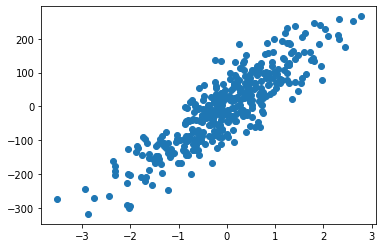

In [12]:
plt.scatter(x[1], y)

In [13]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

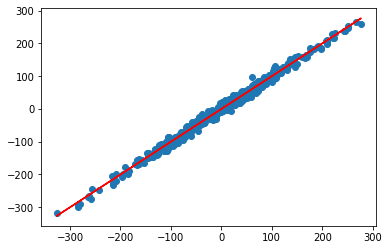

In [14]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

### Задания для самостоятельного выполнения
1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.
2. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. 3. Сделайте вывод о значимости регрессии.
3. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.
4. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.
5. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

### 1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

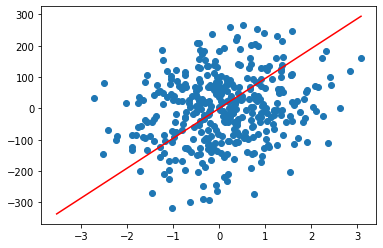

In [15]:
plt.scatter(x[0], y)
xx = np.linspace(x[1].min(), x[0].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

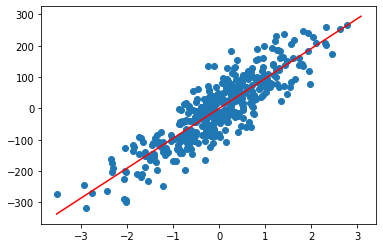

In [16]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [52]:
def f(a):
    plt.scatter(x[a], y)
    xx = np.linspace(x[a].min(), x[a].max(), 100).reshape((-1, 1))
    plt.plot(xx, binary.predict(xx), c='r')

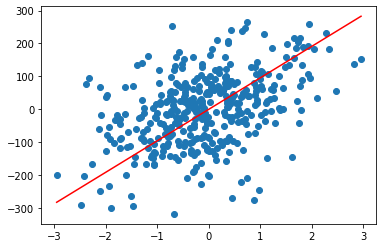

In [56]:
f(2)

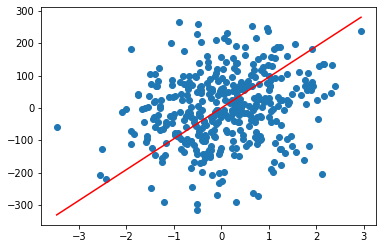

In [54]:
f(3)

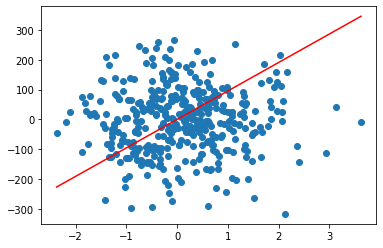

In [55]:
f(4)

### 2. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. 3. Сделайте вывод о значимости регрессии.

In [172]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from pylab import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [194]:
scores = pd.DataFrame(columns=['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]'], index=['degree 2', 'degree 3', 'degree 10'])
scores

,x[0],x[1],x[2],x[3],x[4]
degree 2,NaN,NaN,NaN,NaN,NaN
degree 3,NaN,NaN,NaN,NaN,NaN
degree 10,NaN,NaN,NaN,NaN,NaN


In [195]:
MSE = pd.DataFrame(columns=['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]'], index=['degree 2', 'degree 3', 'degree 10'])
MAPE = pd.DataFrame(columns=['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]'], index=['degree 2', 'degree 3', 'degree 10'])

In [196]:
def pol(a, b):
    linreg = LinearRegression()
    pf = PolynomialFeatures(degree=b)
    poly = pf.fit_transform(x[[a]])
    linreg.fit(poly, y)
    
    scores.loc[f'degree {b}', f'x[{a}]'] = linreg.score(poly, y)
    MSE.loc[f'degree {b}', f'x[{a}]'] = mean_squared_error(y, linreg.predict(poly))
    MAPE.loc[f'degree {b}', f'x[{a}]'] = mean_absolute_percentage_error(y1, linreg.predict(poly))
    
    xx = np.linspace(x[a].min(), x[a].max(), 100).reshape(-1, 1)
    t_poly = pf.fit_transform(xx)
    plt.scatter(x[a], y)
    plt.plot(xx, linreg.predict(t_poly), c='r')
    
    
    

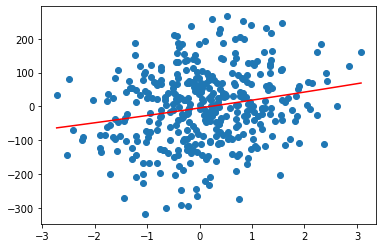

In [197]:
pol(0, 2)

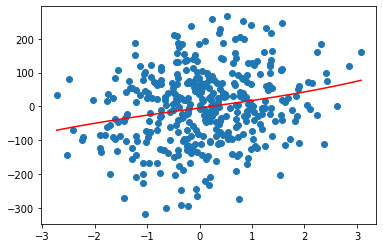

In [198]:
pol(0, 3)

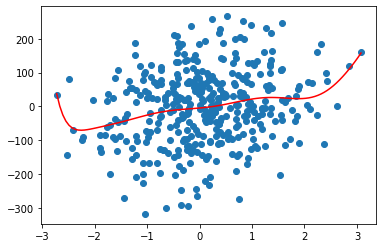

In [199]:
pol(0, 10)

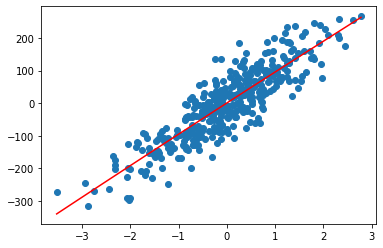

In [200]:
pol(1, 2)

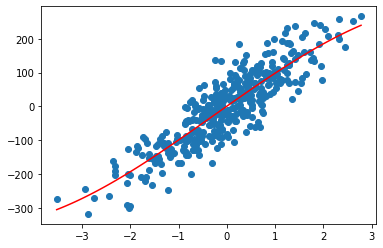

In [201]:
pol(1, 3)

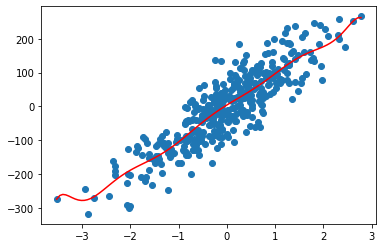

In [202]:
pol(1, 10)

### 3.Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [203]:
scores

,x[0],x[1],x[2],x[3],x[4]
degree 2,0.043672,0.769994,NaN,NaN,NaN
degree 3,0.043765,0.771118,NaN,NaN,NaN
degree 10,0.050356,0.772677,NaN,NaN,NaN


### 4. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [204]:
MSE

,x[0],x[1],x[2],x[3],x[4]
degree 2,11491.909255,2763.909753,NaN,NaN,NaN
degree 3,11490.787323,2750.401156,NaN,NaN,NaN
degree 10,11411.58652,2731.672893,NaN,NaN,NaN


In [205]:
MAPE

,x[0],x[1],x[2],x[3],x[4]
degree 2,1.481656,1.633665,NaN,NaN,NaN
degree 3,1.490421,1.685776,NaN,NaN,NaN
degree 10,1.518449,1.638591,NaN,NaN,NaN
